In [9]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [10]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [11]:
x_train , x_test = x_train/255 , x_test/255

In [12]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [13]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.2)

In [14]:
model = keras.models.Sequential([
    keras.layers.Conv2D(128,(3,3),padding="same",activation = 'relu',kernel_regularizer = keras.regularizers.l2(1e-4),input_shape = (32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.35),

    keras.layers.Conv2D(256,(3,3),padding="same",kernel_regularizer = keras.regularizers.l2(1e-4),activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.35),

    keras.layers.Conv2D(512,(3,3),padding="same",kernel_regularizer = keras.regularizers.l2(1e-4),activation='relu'),
    keras.layers.Conv2D(512,(3,3),padding="same",kernel_regularizer = keras.regularizers.l2(1e-4),activation='relu'),
    keras.layers.Conv2D(512,(3,3),padding="same",kernel_regularizer = keras.regularizers.l2(1e-4),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.35),

    keras.layers.Flatten(),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.35), 
    keras.layers.Dense(10,activation = 'softmax')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 8, 8, 256)        

In [16]:
model.compile(optimizer = Adam(lr = 0.00025),loss='categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train,y_train,batch_size=32,epochs = 100,validation_data=(x_valid,y_valid))

Epoch 1/100
1250/1250 [==============================] - 27s 21ms/step - loss: 2.0717 - accuracy: 0.2274 - val_loss: 1.6353 - val_accuracy: 0.3839
Epoch 2/100
1250/1250 [==============================] - 26s 21ms/step - loss: 1.6483 - accuracy: 0.3868 - val_loss: 1.4206 - val_accuracy: 0.4836
Epoch 3/100
1250/1250 [==============================] - 26s 21ms/step - loss: 1.4446 - accuracy: 0.4880 - val_loss: 1.2261 - val_accuracy: 0.5695
Epoch 4/100
1250/1250 [==============================] - 26s 21ms/step - loss: 1.2997 - accuracy: 0.5573 - val_loss: 1.1493 - val_accuracy: 0.6093
Epoch 5/100
1250/1250 [==============================] - 26s 21ms/step - loss: 1.1849 - accuracy: 0.6064 - val_loss: 1.0848 - val_accuracy: 0.6292
Epoch 6/100
1250/1250 [==============================] - 27s 21ms/step - loss: 1.0997 - accuracy: 0.6419 - val_loss: 1.0015 - val_accuracy: 0.6650
Epoch 7/100
1250/1250 [==============================] - 27s 21ms/step - loss: 1.0328 - accuracy: 0.6710 - val_loss: 0

In [22]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0783 - accuracy: 0.8180


[1.0782603025436401, 0.8180000185966492]

In [18]:
predicted_values = model.predict(x_test)
test_actual_result = np.argmax(y_test,axis = 1)
predicted_values = np.argmax(predicted_values,axis=1)

print(classification_report(test_actual_result,predicted_values))

313/313 [==============================] - 3s 7ms/step
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.91      0.91      0.91      1000
           2       0.84      0.67      0.74      1000
           3       0.68      0.62      0.65      1000
           4       0.76      0.84      0.80      1000
           5       0.74      0.74      0.74      1000
           6       0.84      0.90      0.87      1000
           7       0.81      0.89      0.85      1000
           8       0.91      0.86      0.88      1000
           9       0.86      0.91      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [19]:
generated_confusion_matrix = confusion_matrix(test_actual_result,predicted_values)

In [20]:
confusionMatrix = ConfusionMatrixDisplay(confusion_matrix=generated_confusion_matrix,display_labels=[False,True])

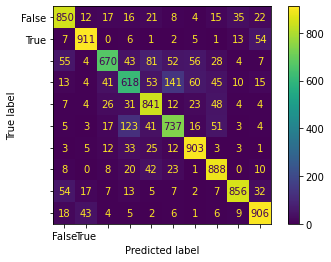

In [21]:
confusionMatrix.plot()
plt.show()